Result  0


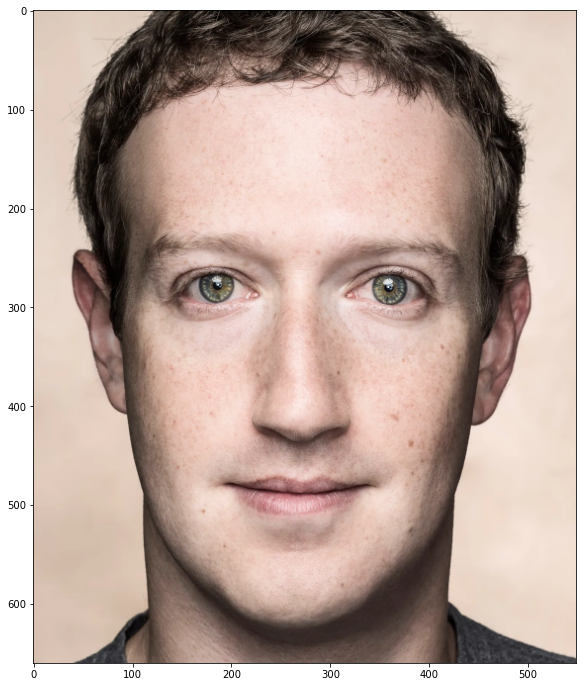

Result  1


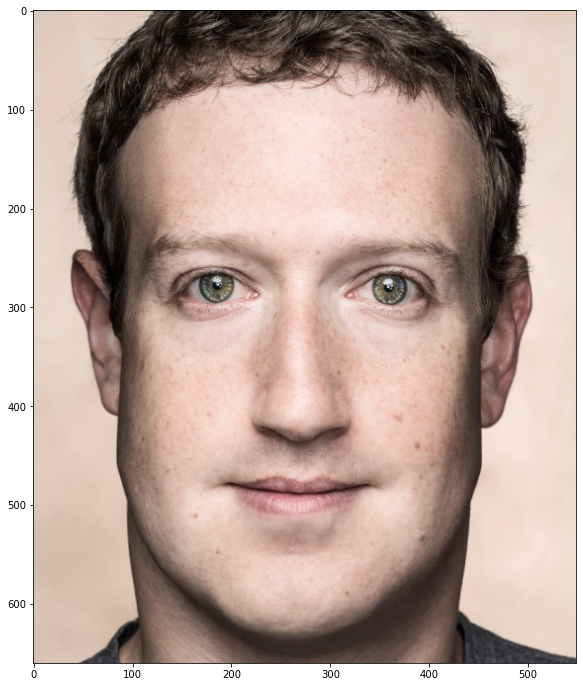

Result  2


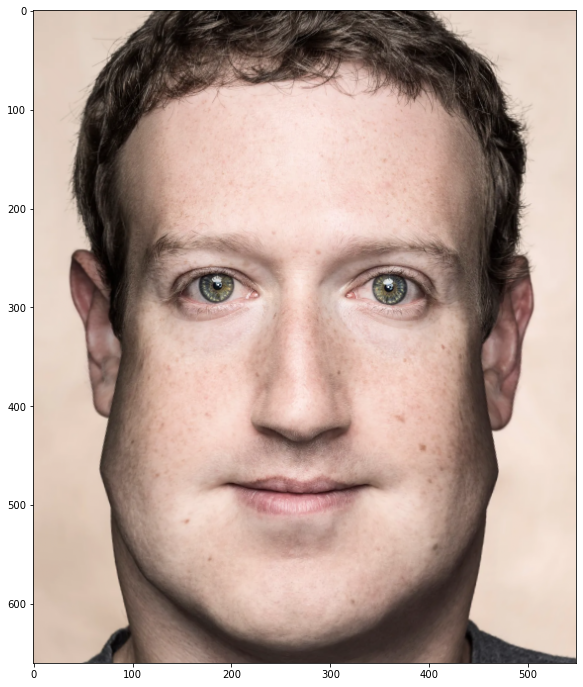

Result  3


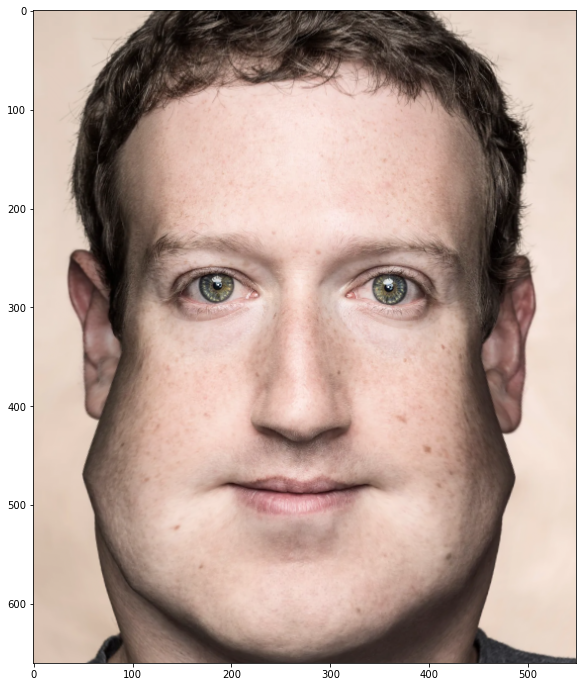

Result  4


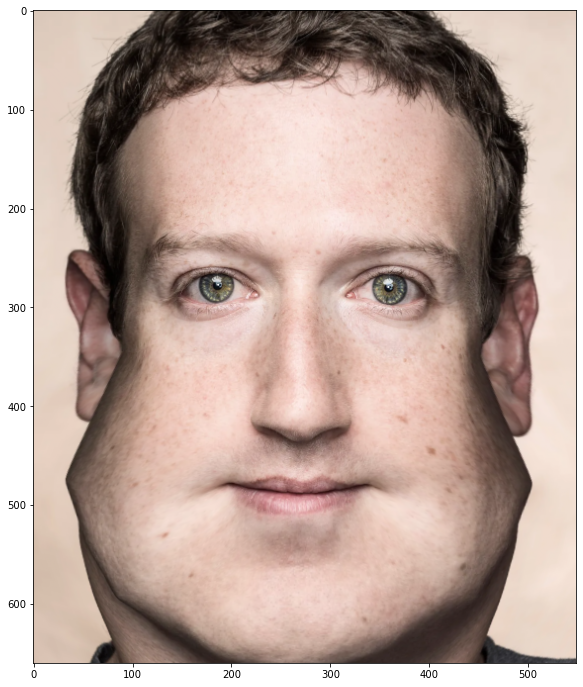

Result  5


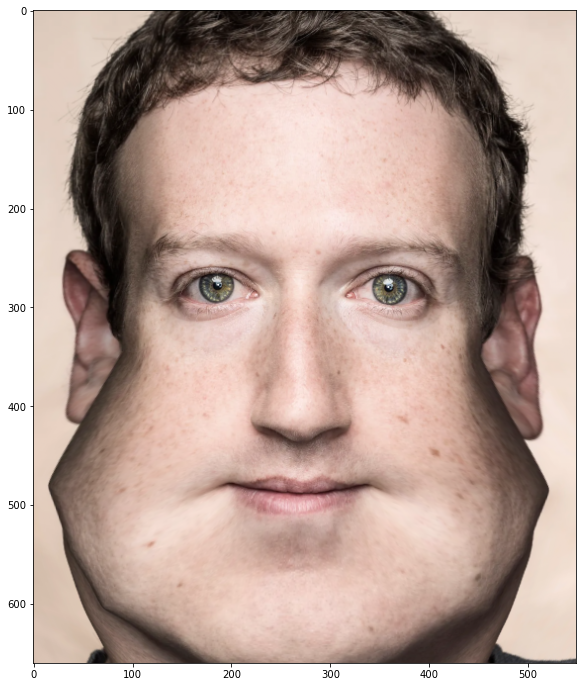

Result  6


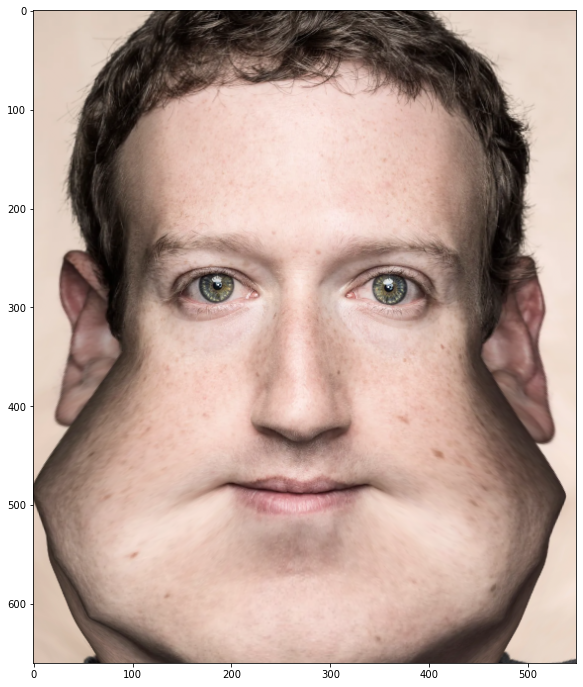

Result  7


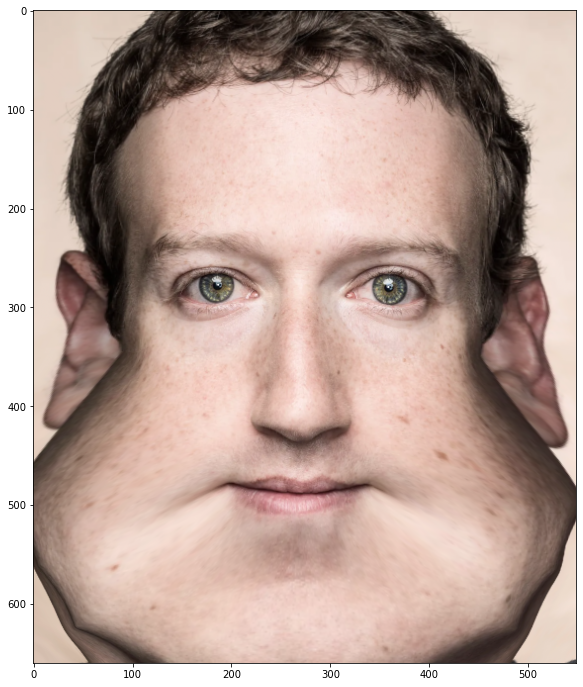

In [2]:
import matplotlib.pyplot as plt

from pychubby.actions import Chubbify, Multiple, Pipeline, Smile, Lambda
from pychubby.detect import LandmarkFace

img_path = '../output/tformed_zucc.jpg'
img = plt.imread(img_path)

lf = LandmarkFace.estimate(img)

for i in range(8):
    a_per_face = Pipeline([Chubbify(0.1*i)])#Smile()])
    a_all = Multiple(a_per_face)

    new_lf, _ = a_all.perform(lf)
    print("Result ", i)
    new_lf.plot(show_landmarks=False, show_numbers=False)

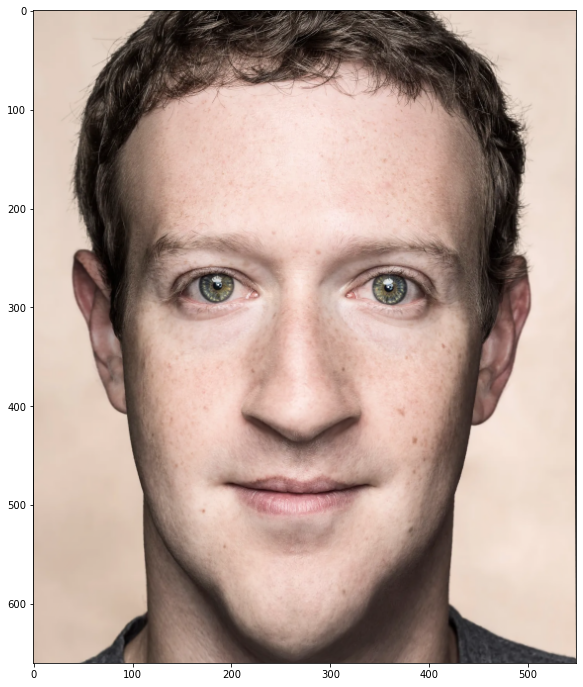

In [45]:
#Implementing a custom action
a_l = Lambda(scale=0.1,
                     specs={'CHIN': (90, 2),
                            'CHIN_L': (110, 1),
                            'CHIN_R': (70, 1),
                            'OUTER_NOSTRIL_L': (-135, 1),
                            'OUTER_NOSTRIL_R': (-45, 1),
                           }
                    )

a_per_face = Pipeline([a_l])
a_all = Multiple(a_per_face)

new_lf2, _ = a_all.perform(lf)
new_lf2.plot(show_landmarks=False, show_numbers=False)

ZUCC mode [click me](https://github.com/jankrepl/pychubby/blob/04d8f66273da6f9bd2f85b740681b56ec5c25ddb/pychubby/actions.py)

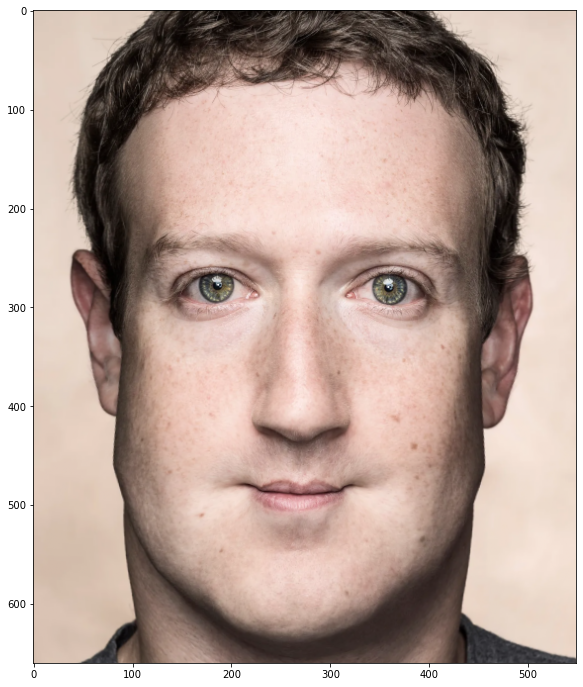

In [46]:
zucc_mouth_specs = {
    53: (-45, 0.5),
    54: (0, 0.9),
    64: (0, 0.9),
    55: (45, 0.5),
    48: (-180, 0.9),
    60: (-180, 0.9),
    49: (-135, 0.5),
    59: (135, 0.5),
    52: (-30, 0.5),
    56: (30, 0.5),
    57: (90, 0.3),
    51: (-90, 0.2),

    #Adding this for mouth length:
    50: (-150, 0.5),
    58: (150, 0.5)
}

zucc_bottom_face_specs = {
            "LOWER_TEMPLE_L": (170, 0.4),
            "LOWER_TEMPLE_R": (10, 0.4),
            "UPPERMOST_CHEEK_L": (160, 1),
            "UPPERMOST_CHEEK_R": (20, 1),
            "UPPER_CHEEK_L": (150, 1),
            "UPPER_CHEEK_R": (30, 1),
            "LOWER_CHEEK_L": (140, 1),
            "LOWER_CHEEK_R": (40, 1),
            "LOWERMOST_CHEEK_L": (130, 0.8),
            "LOWERMOST_CHEEK_R": (50, 0.8),
            "CHIN_L": (120, 0.7),
            "CHIN_R": (60, 0.7),
            "CHIN": (90, 0.7),
}

# 3 diff things here for zucc, mouth, bottom face, and both
mouth_width_bigger = Lambda(scale=-0.1, specs=zucc_mouth_specs)
mouth_width_smaller = Lambda(scale= -0.1, specs=zucc_mouth_specs)
bottom_face_chubby = Lambda(scale = 0.12, specs = zucc_bottom_face_specs)
pipe = Pipeline([mouth_width_bigger, bottom_face_chubby])
mult = Multiple(pipe)

new_lf, _ = mult.perform(lf)
new_lf.plot(show_landmarks=False, show_numbers=False)


# wont use triangulation, these are affine transforms with a scale
# because when i used delaunay i had a goal of going from T1 to T2, but here no T2
# so i just used affine transform to a reference space where i do my shit

Result  0


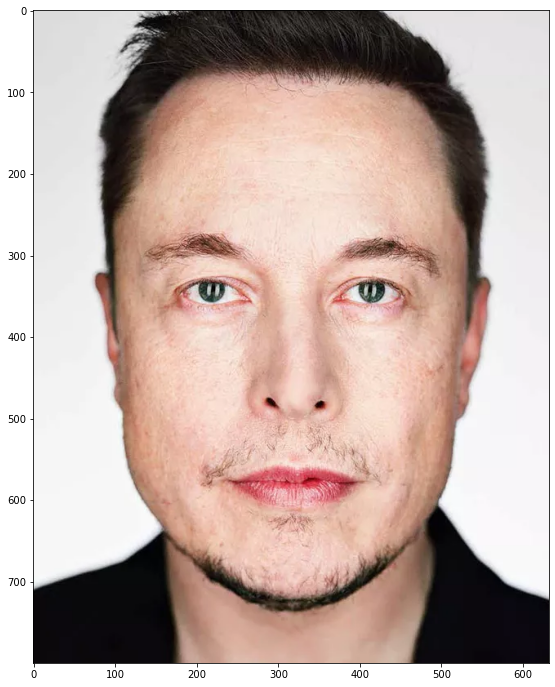

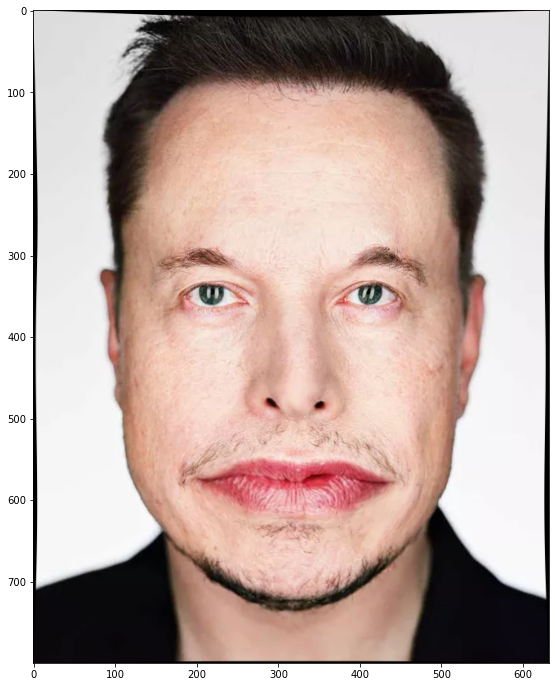

In [47]:
# MUSKRAT TIME
#according to face_statistics_notebook.ipynb, musk has mouth width  + length bigger, and lets say his forehead kamen (so top of his face)
img_path2 = '../output/tformed_musk.jpg'
img2 = plt.imread(img_path2)

lf2 = LandmarkFace.estimate(img2)

a_per_face = Pipeline([Chubbify(0.1*0)])#Smile()])
a_all = Multiple(a_per_face)

new_lf2, _ = a_all.perform(lf2)
print("Result ", 0)
new_lf2.plot(show_landmarks=False, show_numbers=False)


musk_mouth_specs = {
    53: (-45, 0.5),
    54: (0, 0.9),
    64: (0, 0.9),
    55: (45, 0.5),
    48: (-180, 0.9),
    60: (-180, 0.9),
    49: (-135, 0.5),
    59: (135, 0.5),
    52: (-30, 0.5),
    56: (30, 0.5),
    57: (90, 0.3),
    51: (-90, 0.2),

    #Adding this for mouth length:
    50: (-150, 0.5),
    58: (150, 0.5)
}

musk_forehead_specs = {
    17: (-140, 0.5),
    18: (-135, 0.5),
    19: (-90, 0.5),
    20: (-70, 0.5),
    21: (-50, 0.5),

    22: (-140, 0.5),
    23: (-160, 0.5),
    24: (-90, 0.5),
    25: (-45, 0.5),
    26: (-40, 0.5),

    0: (110, 0.3),
    16: (70, 0.3),

    36: (-140, 0.1),
    37: (-90, 0.1),
    38: (-70, 0.1),
    39: (-50, 0.1),
    40: (-90, 0.1),
    41: (-90, 0.1),

    42: (-140, 0.1),
    43: (-90, 0.1),
    44: (-45, 0.1),
    45: (-40, 0.1),
    46: (-45, 0.1),
    47: (-40, 0.1),


}

mouth_bigger = Lambda(scale=0.2, specs=musk_mouth_specs)
forehead_bigger = Lambda(scale=-0.2, specs=musk_forehead_specs)

pipe = Pipeline([mouth_bigger, forehead_bigger])
mult = Multiple(pipe)

new_lf2, _ = mult.perform(lf2)
new_lf2.plot(show_landmarks=False, show_numbers=False)


Result  0


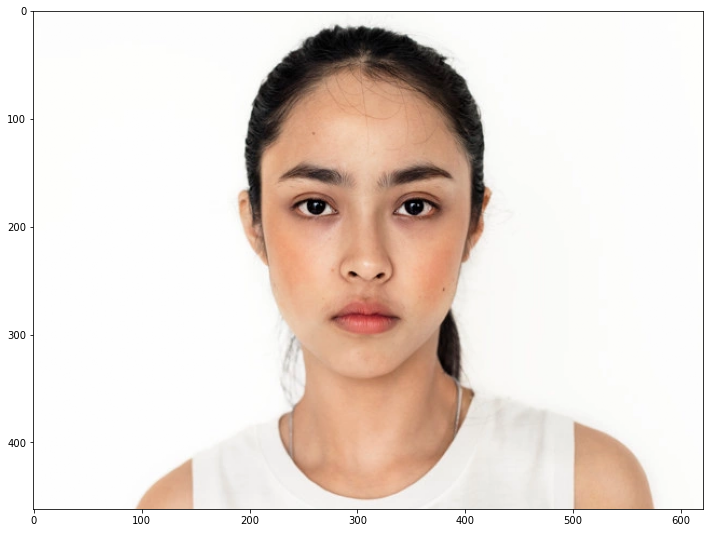

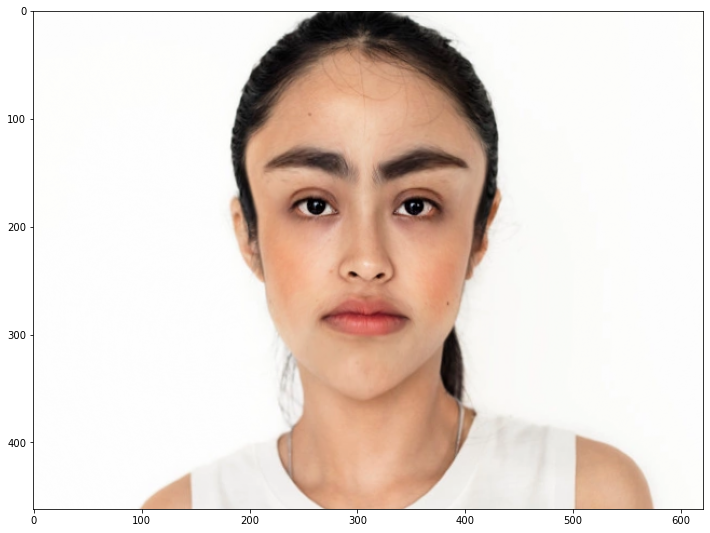

In [62]:
# WOMEN MOMENT
# she has a longer face and wider mouth
# ~30% order of magnitude difference in scale difference

img_path3 = '../output/woman2.png'
img3 = plt.imread(img_path3)

lf3 = LandmarkFace.estimate(img3)

a_per_face = Pipeline([Chubbify(0)])#Smile()])
a_all = Multiple(a_per_face)

new_lf3, _ = a_all.perform(lf3)
print("Result ", 0)
new_lf3.plot(show_landmarks=False, show_numbers=False)

woman_mouth_specs = {
    53: (-45, 0.5),
    54: (0, 0.9),
    64: (0, 0.9),
    55: (45, 0.5),
    48: (-180, 0.9),
    60: (-180, 0.9),
    49: (-135, 0.5),
    59: (135, 0.5),
    52: (-30, 0.5),
    56: (30, 0.5),
    57: (90, 0.3),
    51: (-90, 0.2),

    #Adding this for mouth length:
    50: (-150, 0.5),
    58: (150, 0.5)
}

longer_face_specs = {
    0: (100, 0.4),
    1: (100, 0.4),
    2: (100, 0.4),
    3: (100, 0.4),
    4: (100, 0.4),
    5: (100, 0.4),
    6: (100, 0.4),
    7: (90, 0.4),

    8: (90, 0.5),

    9: (90, 0.4),
    10: (80, 0.4),
    11: (80, 0.4),
    12: (80, 0.4),
    13: (80, 0.4),
    14: (80, 0.4),
    15: (80, 0.4),
    16: (80, 0.4),

    17: (-140, 0.4),
    18: (-135, 0.4),
    19: (-90, 0.4),
    20: (-70, 0.4),
    21: (-50, 0.2),

    22: (-140, 0.2),
    23: (-160, 0.4),
    24: (-90, 0.4),
    25: (-45, 0.4),
    26: (-40, 0.4),
}

mouth_bigger = Lambda(scale=0.1, specs=woman_mouth_specs)
face_longer = Lambda(scale=0.5, specs=longer_face_specs)
pipe = Pipeline([mouth_bigger, face_longer])
mult = Multiple(pipe)

new_lf4, _ = mult.perform(lf3)
new_lf4.plot(show_landmarks=False, show_numbers=False)